In [1]:
import numpy as np
import pandas as pd

In [2]:
X=[]
Y=[]
lines=[]
with open('C://Users//HP//Desktop//ML//Self-Driving-Car//driving_dataset//data.txt') as file:
    lines=file.readlines()
    
for line in lines:
    w=line.split()
    X.append(w[0])
    Y.append(float(w[1]))
        

In [3]:
for i,x in enumerate(X):
    X[i]='C://Users//HP//Desktop//ML//Self-Driving-Car//driving_dataset//'+X[i]
    
X[4]

'C://Users//HP//Desktop//ML//Self-Driving-Car//driving_dataset//4.jpg'

In [31]:
import math

for i,y in enumerate(Y):
    Y[i]=(y*math.pi)/180

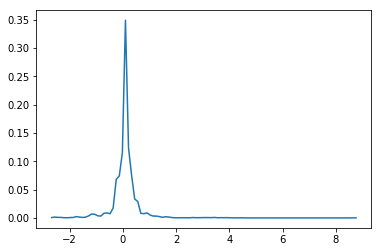

In [32]:
import matplotlib.pyplot as plt

counts,bin_edges=np.histogram(Y,bins=100,density=True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.show()

In [33]:
import keras
import cv2

class Generator(keras.utils.Sequence):
    
    def __init__(self,X,Y,batch_size):
        self.X=X
        self.Y=Y
        self.batch_size=batch_size
        
    def __len__(self):
        return int(np.ceil(len(self.X)/batch_size))
    
    def __getitem__(self,idx):
        batch_x=self.X[idx*self.batch_size : (idx+1)*self.batch_size]
        batch_y=self.Y[idx*self.batch_size : (idx+1)*self.batch_size]
        
        x_vec=[]
        for img in batch_x:
            x_vec.append(cv2.imread(img))
            
        return np.array(x_vec),np.array(batch_y)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

width=256
height=455
channels=3
batch_size=256
epochs=30
model=Sequential()

#Conv Layer-1
model.add(Conv2D(50,kernel_size=5,input_shape=(width,height,channels),
                 data_format='channels_last',padding='same'
                 ,activation='relu'))

#Max Pool Layer-1
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Conv Layer-2
model.add(Conv2D(50,kernel_size=5,activation='relu'))

#Max Pool Layer-2
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#Conv Layer-3
model.add(Conv2D(100,kernel_size=5,activation='relu'))
model.add(Flatten())

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))



In [20]:
# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 455, 50)      3800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 227, 50)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 223, 50)      62550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 111, 50)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 107, 100)      125100    
_________________________________________________________________
flatten_1 (Flatten)          (None, 620600)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.25,random_state=1)

print("train:",len(X_train),len(Y_train))
print("val:",len(X_val),len(Y_val))

train: 34054 34054
val: 11352 11352


In [35]:
from sklearn.metrics import mean_squared_error

z=[0]*len(Y_val)
mean_squared_error(Y_val, z)

0.29239003743277403

In [38]:
batch_size = 32

training_batch_generator =Generator(X_train, Y_train, batch_size)
validation_batch_generator =Generator(X_val, Y_val, batch_size)

model.fit(training_batch_generator,
            steps_per_epoch=int(len(X_train)//batch_size),
            epochs = 30,
            verbose=1,
            workers=100,
            validation_data=validation_batch_generator,
            validation_steps=int(len(X_val)//batch_size))

Epoch 1/30
   5/1064 [..............................] - ETA: 2:31:27 - loss: 13.3073 - mean_absolute_error: 13.3073

KeyboardInterrupt: 